In [58]:
# For handling dataset
import pandas as pd
# For plotting
import matplotlib.pyplot as plt

# helping to remove outliers
from scipy.stats import iqr

from sklearn.naive_bayes import GaussianNB
import numpy as np
# For undersampling
from imblearn.under_sampling import RandomUnderSampler
# metrics
from sklearn.metrics import precision_recall_curve

In [4]:
df = pd.read_csv('creditcard.csv')
df = df[['V11', 'V13', 'V15', 'Class']]

In [5]:
df.head()

,V11,V13,V15,Class
0,-0.551600,-0.991390,1.468177,0
1,1.612727,0.489095,0.635558,0
2,0.624501,0.717293,2.345865,0
3,-0.226487,0.507757,-0.631418,0
4,-0.822843,1.345852,0.175121,0


In [40]:
X = df.iloc[:,:].copy()

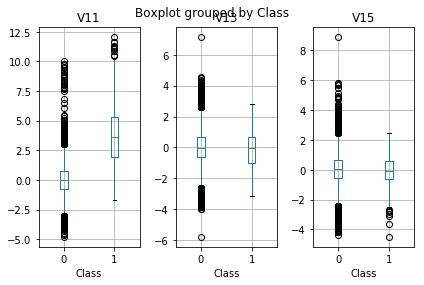

In [147]:
ax = plt.subplot(131)
X.boxplot('V11', 'Class', ax=ax)

ax = plt.subplot(132)
X.boxplot('V13', 'Class', ax=ax)

ax = plt.subplot(133)
X.boxplot('V15', 'Class', ax=ax)

plt.tight_layout()
plt.show()

In [145]:
X_new, y_new = X.iloc[:,:-1].copy(), X.iloc[:,-1].copy()

In [43]:
# separating the legits from the fraudulents
isFraud = np.array(y_new==1, dtype=bool)
legit, fraud = X_new[~isFraud], X_new[isFraud]

In [44]:
# removing outliers from legit sample
for idx, feat in enumerate(legit.columns):
    q75, q25 = np.percentile(legit[feat], [75 ,25])
    iqr_ = iqr(legit[feat])*1.5
    
    greater = np.array(legit[feat] < q25 - iqr_, dtype=bool)
    legit.loc[greater, feat] = np.nan
    
    lower   = np.array(legit[feat] > q75 + iqr_, dtype=bool)
    legit.loc[lower, feat] = np.nan

C:\Users\rodrigo.silva\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\rodrigo.silva\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [45]:
legit = pd.concat([legit, fraud], axis=0)

In [47]:
legit = pd.concat([legit, y_new], axis=1)

In [48]:
legit = legit.dropna()

In [99]:
legit.isnull().sum()

V11      0
V13      0
V15      0
Class    0
dtype: int64

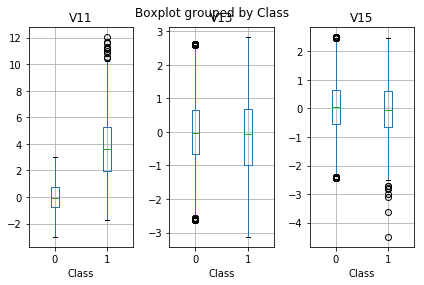

In [146]:
ax = plt.subplot(131)
legit.boxplot('V11', 'Class', ax=ax)

ax = plt.subplot(132)
legit.boxplot('V13', 'Class', ax=ax)

ax = plt.subplot(133)
legit.boxplot('V15', 'Class', ax=ax)

plt.tight_layout()
plt.show()

In [193]:
rus = RandomUnderSampler(ratio={0:492*40, 1:492}, random_state=0)
#X_resampled, y_resampled = rus.fit_sample(legit.iloc[:,:-1], legit.iloc[:,-1:].Class)
X_resampled, y_resampled = rus.fit_sample(X_new, y_new)

In [194]:
clf = GaussianNB()
clf.fit(X_resampled, y_resampled)

GaussianNB(priors=None)

In [195]:
y_pred = clf.predict(X_new)
print y_pred[:5]

[0 0 0 0 0]


In [196]:
precision, recall, _ = precision_recall_curve(y_pred, y_new)
print 'precision %.2f' % precision[1]
print 'recall %.2f' % recall[1]

precision 0.60
recall 0.51
